Firstly we import all libraries using in NLP 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Then we import our dataset from kaggle Restaurant reviews

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
nltk.download('stopwords')
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text-Preprocessing using stopwords and PorterStemmer

In [15]:
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

Creating a bag-of-words model

In [22]:
cv = CountVectorizer(max_features=1500)
X= cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values


Splitting into Training and Test sets

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state =0)

Naive Bayes algorithm

In [10]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

confusion matrix for Naive Bayes

In [23]:
cm_NB = confusion_matrix(y_test, y_pred_NB) 
cm_NB

array([[55, 42],
       [12, 91]], dtype=int64)

In [25]:
TP_NB = 91 #True Positives (Naive Bayes)
TN_NB = 55 #True Negatives (Naive Bayes)
FP_NB = 12 #False Positives (Naive Bayes)
FN_NB = 42 #False Negatives (Naive Bayes)

Accuracy of the Naive Bayes Algorithm

In [28]:
Accuracy_NB = (TP_NB + TN_NB) / (TP_NB + TN_NB + FP_NB + FN_NB) 
Accuracy_NB 

0.73

In [ ]:
Precision of the Naive Bayes Algorithm

In [29]:
Precision_NB = TP_NB / (TP_NB + FP_NB)
Precision_NB

0.883495145631068

Recall of the Naive Bayes Algorithm

In [30]:
Recall_NB = TP_NB / (TP_NB + FN_NB)
Recall_NB

0.6842105263157895

F1 Score of the Naive Bayes Algorithm

In [31]:
F1_Score_NB = 2 * Precision_NB * Recall_NB / (Precision_NB + Recall_NB) 
F1_Score_NB

0.7711864406779663

Decision Tree algorithm 
Fitting Decision Tree Classification to the Training set

In [34]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the Test set results

In [35]:
In [59]: y_pred_DT = classifier.predict(X_test)
y_pred_DT

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

Making the Confusion Matrix

In [38]:
cm_DT = confusion_matrix(y_test, y_pred_DT) 
cm_DT

array([[74, 23],
       [35, 68]], dtype=int64)

In [39]:
TP_DT = 68 #True Positives (Decision Tree)
TN_DT = 74 #True Negatives (Decision Tree)
FP_DT = 35 #False Positives (Decision Tree)
FN_DT = 23 #False Negatives (Decision Tree)

Accuracy of the Decision Tree Algorithm

In [40]:
Accuracy_DT = (TP_DT + TN_DT) / (TP_DT + TN_DT + FP_DT + FN_DT)
Accuracy_DT

0.71

Precision of the Decision Tree Algorithm

In [41]:
Precision_DT = TP_DT / (TP_DT + FP_DT)
Precision_DT

0.6601941747572816

Recall of the Decision Tree Algorithm

In [42]:
Recall_DT = TP_DT / (TP_DT + FN_DT)
Recall_DT

0.7472527472527473

F1 score of the Decision Tree Algorithm

In [43]:
F1_Score_DT = 2 * Precision_DT * Recall_DT / (Precision_DT + Recall_DT)
F1_Score_DT

0.7010309278350515

Random Forest algorithm

In [44]:
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

Predicting the Test set results

In [45]:
y_pred_RF = classifier.predict(X_test)
y_pred_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

Making the Confusion Matrix

In [47]:
cm_RF = confusion_matrix(y_test, y_pred_RF) 
cm_RF

array([[87, 10],
       [47, 56]], dtype=int64)

In [48]:
# Calculating True/False Positives/Negatives
TP_RF = 56 #True Positives (Random Forest)
TN_RF = 87 #True Negatives (Random Forest)
FP_RF = 47 #False Positives (Random Forest)
FN_RF = 10 #False Negatives (Random Forest)

Accuracy of Random Forest

In [49]:
Accuracy_RF = (TP_RF + TN_RF) / (TP_RF + TN_RF + FP_RF + FN_RF)
Accuracy_RF

0.715

Precision of Random Forest

In [50]:
Precision_RF = TP_RF / (TP_RF + FP_RF)
Precision_RF

0.5436893203883495

Recall of Random Forest

In [51]:
Recall_RF = TP_RF / (TP_RF + FN_RF)
Recall_RF

0.8484848484848485

F1 score of Random Forest

In [52]:
F1_Score_RF = 2 * Precision_RF * Recall_RF / (Precision_RF + Recall_RF)
F1_Score_RF

0.6627218934911243

ComparingModels
Comparing Model Accuracy

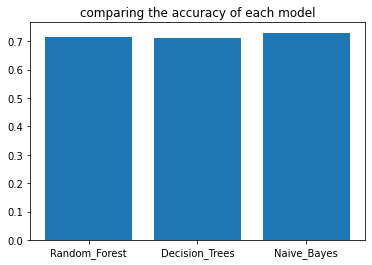

In [56]:
Accuracy = [Accuracy_RF, Accuracy_DT, Accuracy_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

Comparing Model Precision

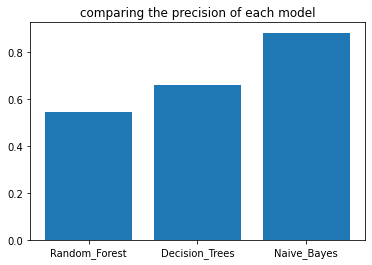

In [57]:
Precision = [Precision_RF, Precision_DT, Precision_NB]
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('comparing the precision of each model')
plt.show()

Comparing Model Recall

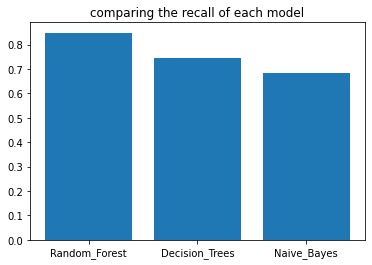

In [58]:
Recall = [Recall_RF, Recall_DT, Recall_NB]
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('comparing the recall of each model')
plt.show()

Comparing Model F1 Scores

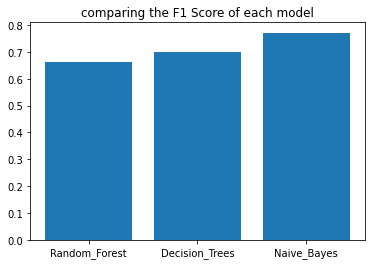

In [59]:
F1_Score = [F1_Score_RF, F1_Score_DT, F1_Score_NB]
F1_Score_pos = np.arange(len(Methods))
plt.bar(F1_Score_pos, F1_Score)
plt.xticks(F1_Score_pos, Methods)
plt.title('comparing the F1 Score of each model')
plt.show()

Conclusion
On average our models are about 71.8% accurate
Out of the 3 used in this project, the most accurate and precise was the Naive Bayes algorithm.
The Naive Bayes algorithm has the highest F1 score, which means that it defines a relationship between Recall and Precision of a particular model. F1 Scores might be a better measure to use if we need to seek a balance between Precision and Recall AND if there is an uneven class distribution 